<a href="https://colab.research.google.com/github/harigovindr2003/projects/blob/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


## Initializing dataset

In [ ]:
!wget https://github.com/harigovindr2003/projects/blob/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/dataset/train.csv
!wget https://github.com/harigovindr2003/projects/blob/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/dataset/test.csv
!wget https://github.com/harigovindr2003/projects/blob/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/dataset/data_description.txt

In [ ]:
import pandas as pd
train_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train = train_original.copy()
test = test_original.copy()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- The **training dataset** (`train.csv`) has a `SalePrice` column, which is the **target variable** we need to predict.
- The **test dataset** (`test.csv`) does not have the `SalePrice` column since it is the data on which we will make predictions.
- The dataset consists of both **numerical** and **categorical** variables.
- Some columns contain **missing values**, which will need to be handled in data preprocessing.

## Check for missing values

In [ ]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
print("\nMissing Values: \n", missing_values)


Missing Values: 
 Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


During model building, we will deal with the missing values of those columns that are relevant to the model.

## Summary statistics

In [ ]:
print("\nSummary Statics: \n", train.describe())


Summary Statics: 
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066

## Distribution of the target variable

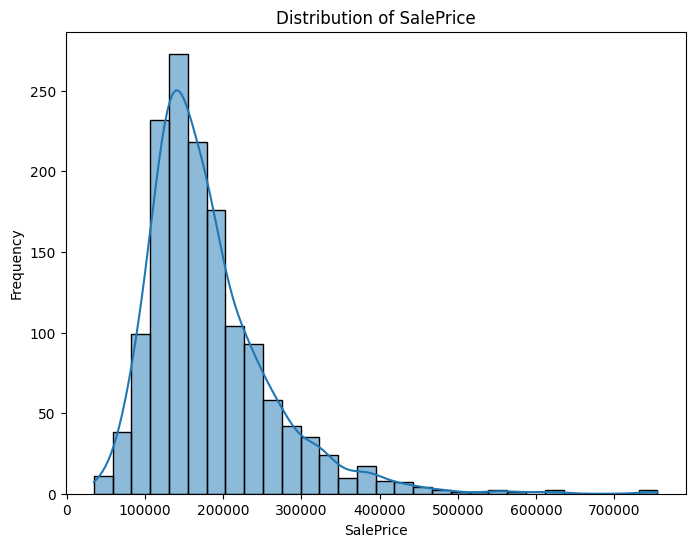

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Preprocessing

## Fixing categorical variables

### Identification

- **Method:**  
  We started by extracting all columns with object data types using `select_dtypes(include=['object'])`. This step lets us isolate variables that are inherently non-numeric and require special handling.

- **Purpose:**  
  This identification allows us to focus our analysis on features that might impact the target variable, `SalePrice`, in non-numerical ways.

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


We remove those categorical variables that have more than 50% of the values missing as they don't give us a clear picture of the data.

In [ ]:
missing_percentages = train[categorical_cols].isnull().mean() * 100
threshold = 50
# Filter out variables with more than the threshold percentage of missing values
filtered_categorical = missing_percentages[missing_percentages <= threshold].index
print("Categorical variables after filtering for missing values:")
print(filtered_categorical)

Categorical variables after filtering for missing values:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


### Impact evaluation

We compute the **Mean Difference** across categories to capture how much the average `SalePrice` varies between the categories in a categorical variable. We then select the relevant and influential varibales.

In [ ]:
variation_data = []
for col in filtered_categorical:
  group_stats = train.groupby(col)['SalePrice'].mean()
  mean_diff = group_stats.max() - group_stats.min()
  variation_data.append([col, mean_diff])
variation_df = pd.DataFrame(variation_data, columns=['Feature', 'Mean_Difference'])
variation_df = variation_df.sort_values(by='Mean_Difference', ascending=False)
print("Top 10 Categorical Variables based on Mean Difference:")
print(variation_df.head(10))

Top 10 Categorical Variables based on Mean Difference:
          Feature  Mean_Difference
16      ExterQual    279375.747253
13       RoofMatl    253250.000000
7    Neighborhood    236718.846485
9      Condition2    228250.000000
28    KitchenQual    222989.464872
15    Exterior2nd    214000.000000
19       BsmtQual    211349.012751
30    FireplaceQu    207948.350000
14    Exterior1st    191000.000000
37  SaleCondition    168166.752000


Among these variables, selecting the ones with a clear rating system will make the conversion process much more smoother. So we will select the following variables for our study:

1. **ExterQual**: Evaluates the quality of the material on the exterior
2. **KitchenQual**: Kitchen quality
3. **BsmtQual**: Evaluates the height of the basement
4. **FireplaceQu**: Fireplace quality

*Using all the cateogrical variables by converting using Dummies or One-hot encoding brings more noise to the model and worsens the accuracy. So we have decided to stick with these variables for this project.*

### Conversion

Our next step is to convert these variables into numerical representations, but the method depends on the nature of the variables.

All our selected variables are **Ordinal Variables** that follow the following structure:

```
  Ex	:Excellent
  Gd	:Good
  TA	:Average/Typical
  Fa	:Fair
  Po	:Poor
  NA    :Not Applicable
```
We'll apply ordinal encoding. This involves mapping each category to a numerical scale that reflects its ranking (e.g., 'NA' < 'Po' < 'Fa' < 'TA' < 'Gd' < 'Ex').

In [ ]:
qual_mapping = {'NA': 0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['ExterQual_num'] = train['ExterQual'].map(qual_mapping)
train['KitchenQual_num'] = train['KitchenQual'].map(qual_mapping)
train['BsmtQual_num'] = train['BsmtQual'].map(qual_mapping)
train['FireplaceQu_num'] = train['FireplaceQu'].map(qual_mapping)

# Do the same for the test set
test['ExterQual_num'] = test['ExterQual'].map(qual_mapping)
test['KitchenQual_num'] = test['KitchenQual'].map(qual_mapping)
test['BsmtQual_num'] = test['BsmtQual'].map(qual_mapping)
test['FireplaceQu_num'] = test['FireplaceQu'].map(qual_mapping)

## Correlation Analysis

Finding the variables highly correlated with `SalePrice`

In [ ]:
import numpy as np
# Select numeric features and compute correlation matrix
numeric_features = train.select_dtypes(include=['number'])
corr_matrix = numeric_features.corr()
# Calculate absolute correlations with SalePrice and remove SalePrice itself
saleprice_corr = corr_matrix['SalePrice'].abs().drop('SalePrice')
# Set a threshold (e.g., 0.5)
threshold = 0.6
# Filter features based on the threshold
selected_features = saleprice_corr[saleprice_corr >= threshold]
print("Features with correlation with SalePrice >= {}:".format(threshold))
print(selected_features)

Features with correlation with SalePrice >= 0.6:
OverallQual        0.790982
TotalBsmtSF        0.613581
1stFlrSF           0.605852
GrLivArea          0.708624
GarageCars         0.640409
GarageArea         0.623431
ExterQual_num      0.682639
KitchenQual_num    0.659600
BsmtQual_num       0.644019
Name: SalePrice, dtype: float64


Checking for **Multicollinearity** among those variables

In [ ]:
# Set threshold for high correlation (e.g., 0.8)
threshold = 0.8
# Get the correlation matrix for only the top features
top_corr = numeric_features[selected_features.index].corr()
# Find pairs with correlation above the threshold (excluding self-correlation)
high_corr_pairs = []
for i in range(len(top_corr.columns)):
    for j in range(i+1, len(top_corr.columns)):
        if abs(top_corr.iloc[i, j]) > threshold:
            feature1 = top_corr.columns[i]
            feature2 = top_corr.columns[j]
            corr_value = top_corr.iloc[i, j]
            high_corr_pairs.append((feature1, feature2, corr_value))
print("Pairs of top features with correlation above", threshold, ":")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Pairs of top features with correlation above 0.8 :
TotalBsmtSF and 1stFlrSF: correlation = 0.82
GarageCars and GarageArea: correlation = 0.88


**Handling Multicollinearity:** As we can see, some variables are highly correlated with each other. This can cause problems during modeling. So, we combine some variables to account for their joint effect and remove some others whose effect has already been captured.


In [ ]:
selected_features = selected_features.index.tolist()
# The effect of the following variables can be comined to a single variable
sf_combined = ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea']
train['TotalSF'] = 0
test['TotalSF'] = 0
for i in sf_combined:
  train['TotalSF'] += train[i]
  test['TotalSF'] += test[i]
  if i in selected_features:
    selected_features.remove(i)
selected_features.append('TotalSF')
# Remove GarageArea since it's effects are already accounted for in GarageCars
selected_features.remove('GarageArea')
print("Selected Features:")
print(selected_features)

Selected Features:
['OverallQual', 'GarageCars', 'ExterQual_num', 'KitchenQual_num', 'BsmtQual_num', 'TotalSF']


The selected variables:
```
1. OverallQual
2. GarageCars
3. ExterQual_num
4. KitchenQual_num
5. BsmtQual_num
6. TotalSF
```
These are the only variables we will use to train the model since these have the most relevant effect.

In [ ]:
numeric_features = train[selected_features + ['SalePrice']]

# Compute the correlation matrix for the selected features along with SalePrice
corr_matrix_selected = numeric_features.corr()

# Extract the correlations with SalePrice, drop SalePrice itself, and sort
selected_corr = corr_matrix_selected['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False)

print("Correlations of selected features with SalePrice:")
print(selected_corr)

Correlations of selected features with SalePrice:
OverallQual        0.790982
TotalSF            0.777123
ExterQual_num      0.682639
KitchenQual_num    0.659600
BsmtQual_num       0.644019
GarageCars         0.640409
Name: SalePrice, dtype: float64


We can see that the varibales we have selected are well correlated with the `SalePrice`. So, we can continue with model building using these variables as independent variables.

## Checking for outliers

In [ ]:
# IQR Method for detecting outliers
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Check for outliers in each selected feature
outlier_counts = {}
for feature in selected_features:
    outliers = detect_outliers_iqr(train, feature)
    outlier_counts[feature] = len(outliers)

# Print outlier counts for each feature
print("Outlier counts per feature (IQR Method):")
print(outlier_counts)

Outlier counts per feature (IQR Method):
{'OverallQual': 2, 'GarageCars': 5, 'ExterQual_num': 0, 'KitchenQual_num': 0, 'BsmtQual_num': 0, 'TotalSF': 30}


`TotalSF` has the most outliers. Let's look at its probability distribution.

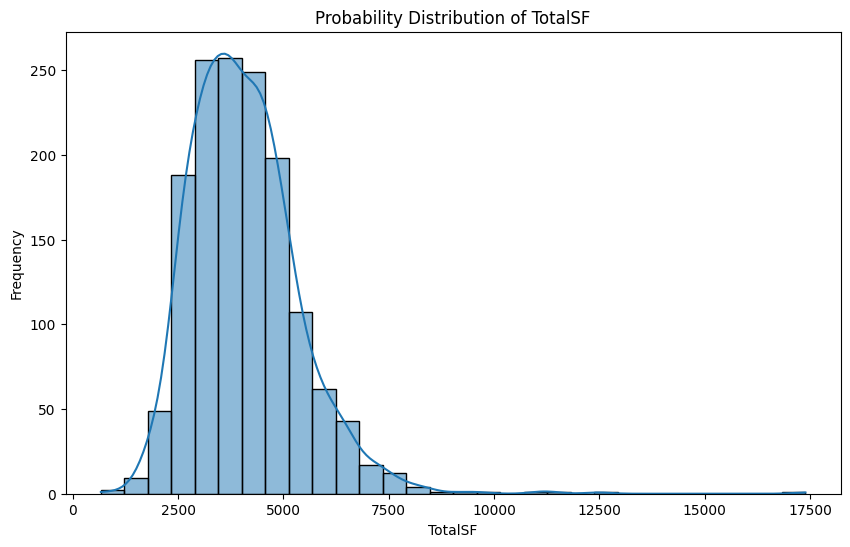

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['TotalSF'], kde=True, bins=30)
plt.title('Probability Distribution of TotalSF')
plt.xlabel('TotalSF')
plt.ylabel('Frequency')
plt.show()

## Applying log transformation

Both `TotalSF`and `SalePrice`follow a normal distribution with a strong right skewness. Transforming both using logarthmic transformations to remove the skewness improves the model accuracy considerably.

In [ ]:
# Apply log transformation to SalePrice and TotalSF in training data
train['SalePrice_log'] = np.log1p(train['SalePrice'])
train['TotalSF_log'] = np.log1p(train['TotalSF'])

# Apply log transformation to TotalSF in test data
test['TotalSF_log'] = np.log1p(test['TotalSF'])
index=selected_features.index("TotalSF")
selected_features[index]="TotalSF_log"

# Modelling

## Multiple linear regression modelling

Baseline Linear Regression RMSE on log scale: 0.16967743700367333
Baseline Linear Regression RMSE on original scale: 32304.024598020682
R2 value: 0.8639497229920008


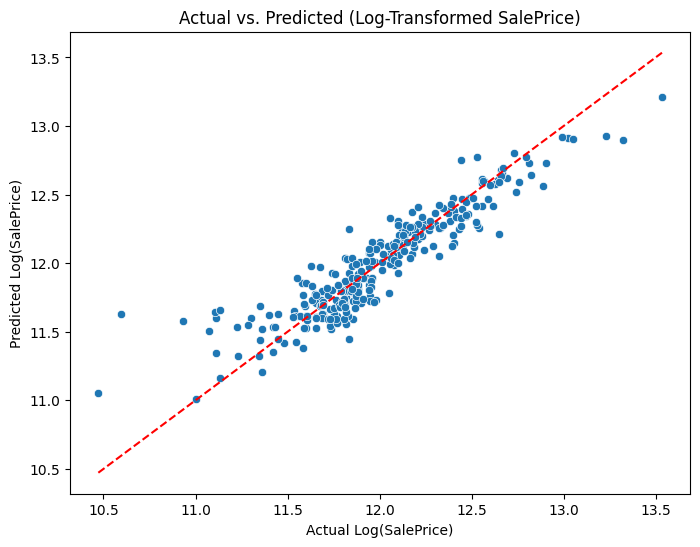

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # Importing mean_squared_error for RMSE calculation
from sklearn.impute import SimpleImputer # Importing the SimpleImputer class

# Create the feature matrix X and target vector y using the transformed target
X = train[selected_features]
y = train['SalePrice_log']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = imputer.fit_transform(X)  # Fit and transform the imputer on your data

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_log = model.predict(X_val)

# Calculate RMSE on the log-transformed scale
rmse_log = np.sqrt(mean_squared_error(y_val, y_pred_log))
print("Baseline Linear Regression RMSE on log scale:", rmse_log)

# Convert predictions back to original scale and compute RMSE there
y_pred_orig = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)
rmse_orig = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print("Baseline Linear Regression RMSE on original scale:", rmse_orig)

from sklearn.metrics import r2_score
r2 = r2_score(y_val_orig, y_pred_orig)
print("R2 value:", r2)

# Visualize Actual vs. Predicted on log scale
import matplotlib.pyplot as plt # Importing matplotlib for visualization
import seaborn as sns # Importing seaborn for enhanced visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred_log)
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.title("Actual vs. Predicted (Log-Transformed SalePrice)")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

## Modelling `SalePrice` in Test Data

In [ ]:
X_test = test[selected_features]
X_test = imputer.transform(X_test)
y_test_pred_log = model.predict(X_test)
y_test_pred_orig = np.expm1(y_test_pred_log)
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred_orig  # or y_test_pred_log if that's what you need
})
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/submission.csv", index=False)
print("Submission file created successfully!")

Submission file created successfully!
